# Week 3: Assessing fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

In [18]:
import graphlab
import numpy as np

## Load data

In [ ]:
sales = graphlab.SFrame('kc_house_data.gl/')
sales = sales.sort(['sqft_living','price'])

In [17]:
def polynomial_sframe(feature, degree):
    poly_sframe = graphlab.SFrame()
    poly_sframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            tmp = feature.apply(lambda x: x**power)
            poly_sframe[name] = tmp
    return poly_sframe

In [19]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

## Create different models

- Linear model

In [20]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.013398     | 4362074.696077     | 261440.790724 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


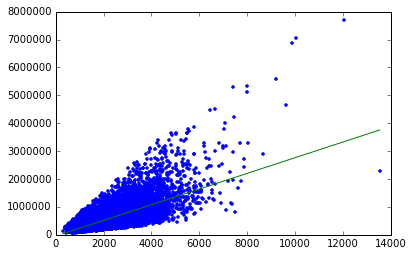

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'], poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data),'-')

In [22]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']

In [24]:
model2 = graphlab.linear_regression.create(poly2_data, 
                                           target = 'price', 
                                           features = ['power_1', 'power_2'], 
                                           validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 2
PROGRESS: Number of unpacked features : 2
PROGRESS: Number of coefficients    : 3
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.015301     | 5913020.984255     | 250948.368758 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


- Ploynomial model

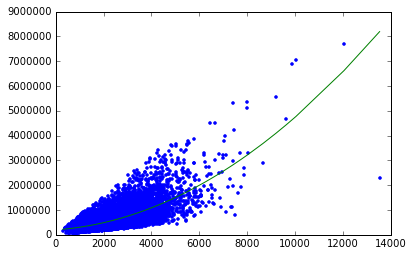

In [25]:
plt.plot(poly2_data['power_1'], poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data),'-')

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 3
PROGRESS: Number of unpacked features : 3
PROGRESS: Number of coefficients    : 4
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.022190     | 3261066.736007     | 249261.286346 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


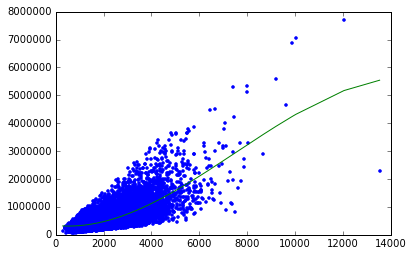

In [26]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']

model3 = graphlab.linear_regression.create(poly3_data, 
                                           target = 'price', 
                                           features = ['power_1', 'power_2', 'power_3'], 
                                           validation_set = None)

plt.plot(poly3_data['power_1'], poly3_data['price'],'.',
         poly3_data['power_1'], model3.predict(poly3_data),'-')

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.029435     | 2662308.584336     | 245690.511190 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


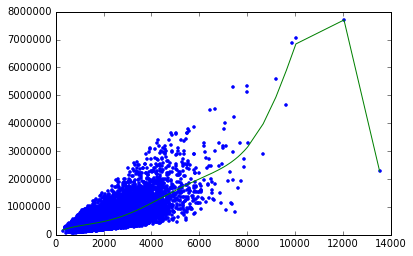

In [27]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

model15 = graphlab.linear_regression.create(poly15_data, 
                                           target = 'price', 
                                           features = ['power_1', 'power_2', 'power_3', 'power_4', 'power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], 
                                           validation_set = None)

plt.plot(poly15_data['power_1'], poly15_data['price'],'.',
         poly15_data['power_1'], model15.predict(poly15_data),'-')

In [28]:
model15.get('coefficients')

name,index,value,stderr
(intercept),None,73619.7521124,932386.401678
power_1,None,410.287462538,4736.29673944
power_2,None,-0.230450714433,9.8605324062
power_3,None,7.58840542482e-05,0.0111697430756
power_4,None,-5.65701802745e-09,7.69719587967e-06
power_5,None,-4.57028130487e-13,3.4042245283e-09
power_6,None,2.66360206432e-17,9.86624536049e-13
power_7,None,3.38584769256e-21,1.85621317895e-16
power_8,None,1.14723104066e-25,2.13709629311e-20
power_9,None,-4.65293586333e-30,1.22655023693e-24


In [29]:
split1, split2 = sales.random_split(0.5, seed=0)

In [30]:
set_1, set_2 = split1.random_split(0.5, seed=0)
set_3, set_4 = split2.random_split(0.5, seed=0)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5404
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.021105     | 2195218.932304     | 248858.822200 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:
+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------

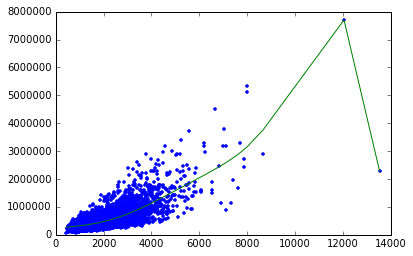

In [33]:
# set_1
poly15_data = polynomial_sframe(set_1['sqft_living'], 15)
poly15_data['price'] = set_1['price']

model15 = graphlab.linear_regression.create(poly15_data, 
                                           target = 'price', 
                                           features = ['power_1', 'power_2', 'power_3', 'power_4', 'power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], 
                                           validation_set = None)

plt.plot(poly15_data['power_1'], poly15_data['price'],'.',
         poly15_data['power_1'], model15.predict(poly15_data),'-')

model15.get('coefficients').print_rows(num_rows=16)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5398
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.019175     | 2069212.978547     | 234840.067186 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:
+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------

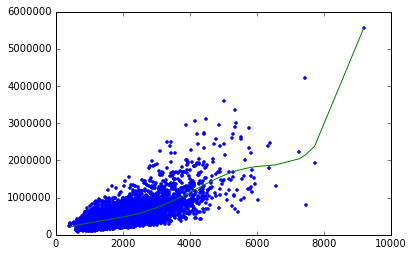

In [34]:
# set_2
poly15_data = polynomial_sframe(set_2['sqft_living'], 15)
poly15_data['price'] = set_2['price']

model15 = graphlab.linear_regression.create(poly15_data, 
                                           target = 'price', 
                                           features = ['power_1', 'power_2', 'power_3', 'power_4', 'power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], 
                                           validation_set = None)

plt.plot(poly15_data['power_1'], poly15_data['price'],'.',
         poly15_data['power_1'], model15.predict(poly15_data),'-')

model15.get('coefficients').print_rows(num_rows=16)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5409
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.022118     | 2269769.506521     | 251460.072754 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:
+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------

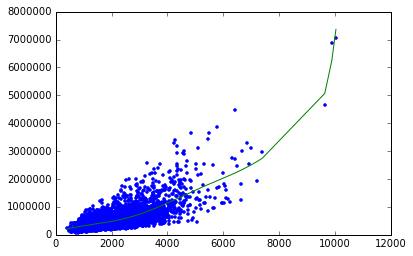

In [35]:
# set_3
poly15_data = polynomial_sframe(set_3['sqft_living'], 15)
poly15_data['price'] = set_3['price']

model15 = graphlab.linear_regression.create(poly15_data, 
                                           target = 'price', 
                                           features = ['power_1', 'power_2', 'power_3', 'power_4', 'power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], 
                                           validation_set = None)

plt.plot(poly15_data['power_1'], poly15_data['price'],'.',
         poly15_data['power_1'], model15.predict(poly15_data),'-')

model15.get('coefficients').print_rows(num_rows=16)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5402
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.017527     | 2314893.173827     | 244563.136754 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:
+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------

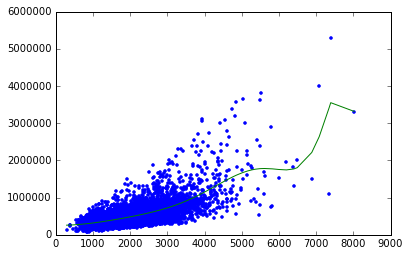

In [36]:
# set_4
poly15_data = polynomial_sframe(set_4['sqft_living'], 15)
poly15_data['price'] = set_4['price']

model15 = graphlab.linear_regression.create(poly15_data, 
                                           target = 'price', 
                                           features = ['power_1', 'power_2', 'power_3', 'power_4', 'power_5','power_6','power_7','power_8','power_9','power_10','power_11','power_12','power_13','power_14','power_15'], 
                                           validation_set = None)

plt.plot(poly15_data['power_1'], poly15_data['price'],'.',
         poly15_data['power_1'], model15.predict(poly15_data),'-')

model15.get('coefficients').print_rows(num_rows=16)

In [37]:
training_and_validation, testing = sales.random_split(0.9, seed=1)
training, validation = training_and_validation.random_split(0.5, seed=1)

In [63]:
def model_run(degree):
    poly_data = polynomial_sframe(training['sqft_living'], degree)
    poly_data['price'] = training['price']
    
    features = []
    for i in range(1, degree+1):
        features.append('power_' + str(i))
    
    model = graphlab.linear_regression.create(poly_data, 
                                               target = 'price', 
                                               features = features,
                                               validation_set = None,
                                             verbose = False )
    
    validation_poly_data = polynomial_sframe(validation['sqft_living'], degree)
    
    errors_squared = (validation['price'] - model.predict(validation_poly_data))**2
    rss_validation = errors_squared.sum()
    return rss_validation

In [64]:
for i in range(1, 16):
    rss_validation = model_run(i)
    print 'degree:', i, 'rss:', rss_validation

degree: 1 rss: 6.76709775198e+14
degree: 2 rss: 6.07090530698e+14
degree: 3 rss: 6.16714574533e+14
degree: 4 rss: 6.09129230654e+14
degree: 5 rss: 5.99177138584e+14
degree: 6 rss: 5.89182477809e+14
degree: 7 rss: 5.91717038418e+14
degree: 8 rss: 6.01558237777e+14
degree: 9 rss: 6.12563853988e+14
degree: 10 rss: 6.21744288936e+14
degree: 11 rss: 6.27012012704e+14
degree: 12 rss: 6.27757914772e+14
degree: 13 rss: 6.24738503262e+14
degree: 14 rss: 6.19369705905e+14
degree: 15 rss: 6.13089202414e+14


In [65]:
# on testing data with the best model
degree = 6
poly_data = polynomial_sframe(training['sqft_living'], degree)
poly_data['price'] = training['price']

features = []
for i in range(1, degree+1):
    features.append('power_' + str(i))

model = graphlab.linear_regression.create(poly_data, 
                                           target = 'price', 
                                           features = features,
                                           validation_set = None,
                                         verbose = False )

testing_poly_data = polynomial_sframe(testing['sqft_living'], degree)

errors_squared = (testing['price'] - model.predict(testing_poly_data))**2
rss_testing = errors_squared.sum()

print rss_testing

1.25529337848e+14
